In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import polars as ps
import pandas as pd
import scipy as sp
from scipy.interpolate import CubicSpline


In [2]:
WS = pd.read_excel("./Tensão_vs_SoC_C100.xlsx")
df_soc = ps.DataFrame(WS)
df_soc = df_soc.drop("Unnamed: 0")
argmin = df_soc["SoC"][:500].to_numpy().argmin()
df_soc = df_soc[argmin:]
argmax = df_soc["SoC"].to_numpy().argmax()


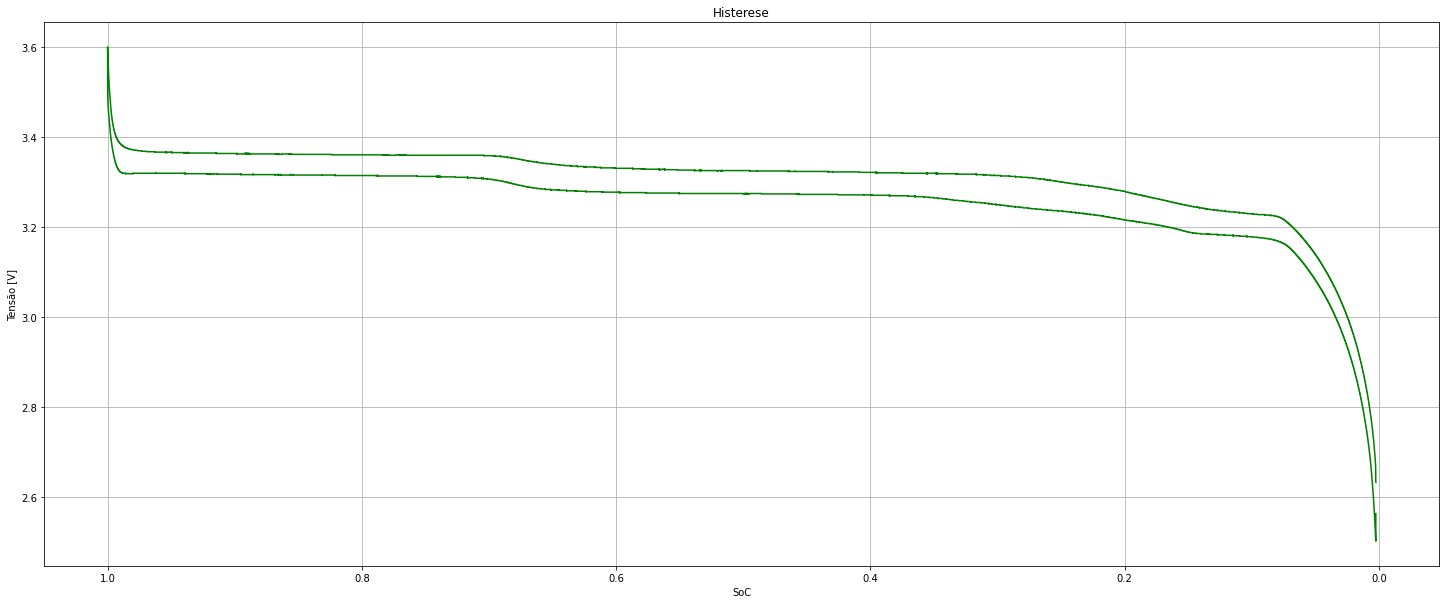

In [8]:
plt.figure(figsize=(25, 10))
ax = sns.lineplot(
    data=df_soc.to_pandas(), x="SoC", y="Tensão [V]", color="green", sort=False
)
ax.invert_xaxis()
plt.grid()
plt.title("Histerese")
plt.show()
plt.close()


In [4]:
sup = df_soc[362:argmax].unique().clone()
sup.sort(by="SoC", in_place=True)
soc = sup["SoC"].to_numpy()
v = sup["Tensão [V]"].to_numpy()
cs_sup = CubicSpline(soc, v)


In [5]:
inf = df_soc[argmax:].unique().sort(by="SoC").clone()
inf = inf[370:34693]
soc = inf["SoC"].to_numpy()
v = inf["Tensão [V]"].to_numpy()
cs_inf = CubicSpline(soc, v)


In [6]:
cs_mid = lambda soc: (cs_sup(soc) + cs_inf(soc)) / 2


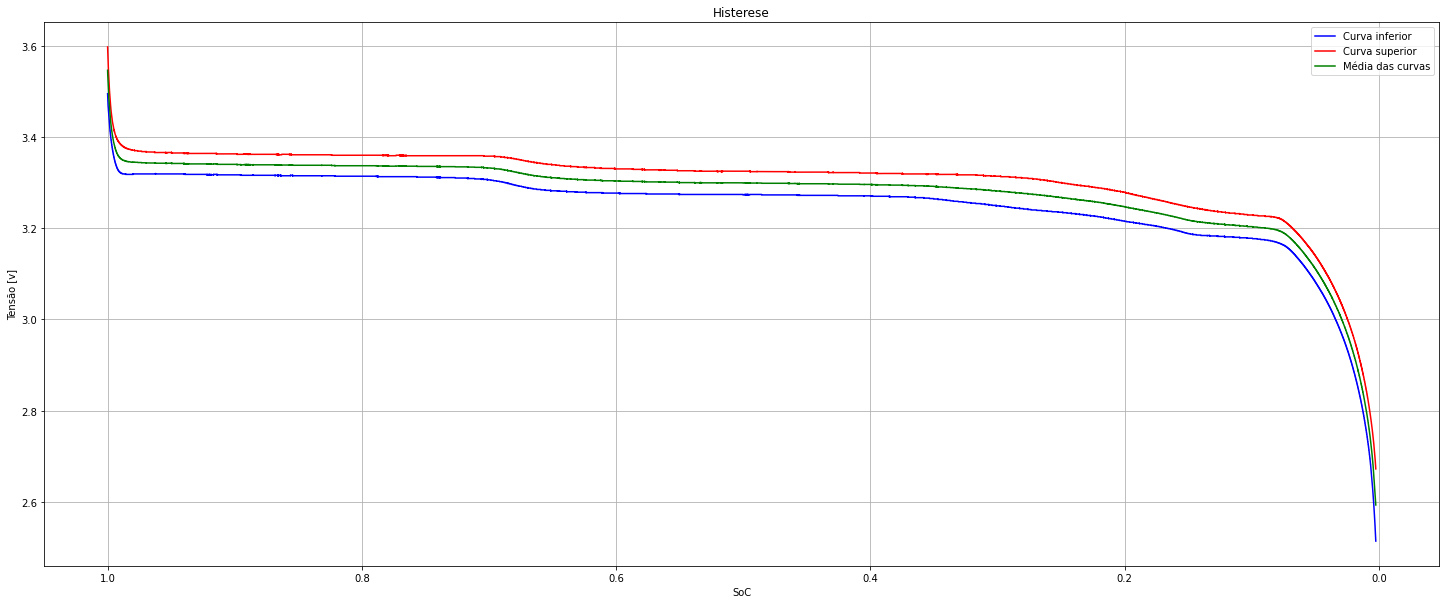

In [7]:
plt.figure(figsize=(25, 10))
ax = sns.lineplot(
    x=soc, y=cs_inf(soc), color="blue", sort=False, label="Curva inferior"
)
ax = sns.lineplot(x=soc, y=cs_sup(soc), color="red", sort=False, label="Curva superior")
ax = sns.lineplot(
    x=soc, y=cs_mid(soc), color="green", sort=False, label="Média das curvas"
)
ax.invert_xaxis()
plt.xlabel("SoC")
plt.ylabel("Tensão [v]")
plt.grid()
plt.title("Histerese")
plt.show()
plt.close()
